# Decisio Tree Algorithm

In [1]:
# import libraries

import math

In [2]:
# example data
# we have two classes one has 4 elements and other has 6 elements

n_A = 4
n_B = 6
total = n_A + n_B

In [4]:
# letscalculate the proportion

p_A = n_A/total
p_B = n_B/total

# print the proportion

print("Proportion of A: ", p_A)
print("Proportion of B:", p_B)

Proportion of A:  0.4
Proportion of B: 0.6


In [6]:
# entropy measurement
# entropy is the measurement of uncertainity

entropy = -p_A * math.log(p_A,2) - p_B *math.log(p_B,2)

print('Entropy: ',entropy)

Entropy:  0.9709505944546686


In [8]:
# Gini impurity
# it is  measure of misclassification

gini = 1-p_A**2 - p_B**2

print("Gini_impurity: ", gini)

Gini_impurity:  0.48


# Decision tree example

In [5]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [7]:
# import dataset

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
# dropthe deck column
df.drop('deck', axis=1, inplace=True)

In [10]:
# imputing missing values of age and fare using median

imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age','fare']])

# impute missing values of embark and embark_town
imputer = SimpleImputer(strategy='most_frequent')
df[['embarked', 'embark_town']] = imputer.fit_transform(df[['embarked','embark_town']])

In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
# encode the categorical and object variable using for loop and labelencoder
le = LabelEncoder()

for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [14]:
# split data into X and y

X = df.drop('survived',axis=1)
y =df['survived']

In [16]:
# split data into train test

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=42)

In [17]:
# create and train the model

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# predict the model
y_pred  = model.predict(X_test)

In [19]:
# evaluate the model

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



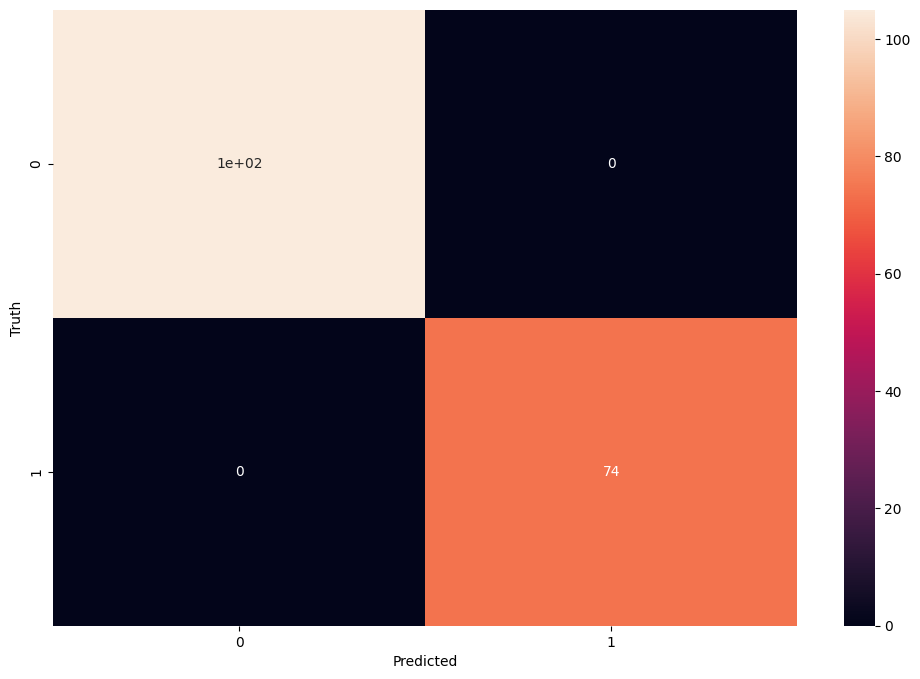

In [22]:
# plot confusion matrix
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [ ]:
# save the dicision tree